In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import re
warnings.filterwarnings('ignore')

In [2]:
df_train= pd.read_csv('Data_Train.csv')
df_test= pd.read_csv('Data_Test.csv')

In [5]:
print("Test:",df_test.head())
print("Train:",df_train.head())

Test:            TITLE  RESTAURANT_ID                                      CUISINES  \
0  CASUAL DINING           4085         North Indian, Chinese, Mughlai, Kebab   
1    QUICK BITES          12680  South Indian, Fast Food, Pizza, North Indian   
2  CASUAL DINING           1411       North Indian, Seafood, Biryani, Chinese   
3           None            204                                       Biryani   
4    QUICK BITES          13453                          South Indian, Kerala   

                                                TIME       CITY      LOCALITY  \
0                      12noon – 12midnight (Mon-Sun)      Noida     Sector 18   
1                            7am – 12:30AM (Mon-Sun)     Mumbai    Grant Road   
2                           11am – 11:30pm (Mon-Sun)     Mumbai  Marine Lines   
3  9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...  Faridabad           NIT   
4                              11am – 10pm (Mon-Sun)      Kochi        Kaloor   

  RATING       VOTES

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [7]:
df_train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [10]:
column=df_train.columns
print(column)
for i in column:
    print(i,"=",df_train[i].nunique())

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')
TITLE = 113
RESTAURANT_ID = 11892
CUISINES = 4155
TIME = 2689
CITY = 359
LOCALITY = 1416
RATING = 32
VOTES = 1847
COST = 86


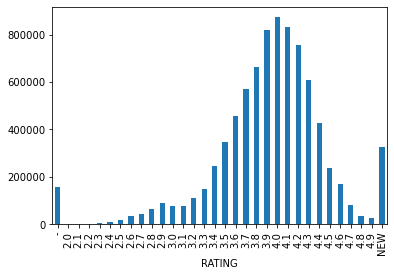

In [12]:
df_train.groupby(['RATING'])['COST'].sum().plot(kind='bar')

In [13]:
df_train['CITY'].value_counts()

Chennai                                        2174
Bangalore                                      2149
Hyderabad                                      1819
Mumbai                                         1722
New Delhi                                      1321
                                               ... 
Chennai - 34 Landmark - Near Loyola College       1
Vaishali Ghaziabad                                1
Nallala Street                                    1
Tripunithura                                      1
Telangana 500081                                  1
Name: CITY, Length: 359, dtype: int64

In [14]:
df = df_train.append(df_test,ignore_index=True)

In [15]:
df = df[['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST']]

In [16]:
def extract_closed(time):
    a = re.findall('Closed \(.*?\)', time)
    if a != []:
        return a[0]
    else:
        return 'NA'

df['CLOSED'] = df['TIME'].apply(extract_closed)

In [17]:
df['TIME'] = df['TIME'].str.replace(r'Closed \(.*?\)','')

In [18]:
df['RATING'] = df['RATING'].str.replace('NEW', '1')
df['RATING'] = df['RATING'].str.replace('-', '1').astype(float)

In [20]:
df['VOTES'] = df['VOTES'].str.replace(' votes', '').astype(float)


In [22]:
df['CITY'].fillna('Missing', inplace=True)
df['LOCALITY'].fillna('Missing', inplace=True)
df['RATING'].fillna(3.8, inplace=True)
df['VOTES'].fillna(0.0, inplace=True)

In [23]:
df['COST'] = df['COST'].astype(float)

In [24]:
df.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,NA
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,NA
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,NA
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,NA
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,NA


In [26]:
calc_mean = df.groupby(['CITY'], axis=0).agg({'RATING': 'mean'}).reset_index()
calc_mean.columns = ['CITY','CITY_MEAN_RATING']
df = df.merge(calc_mean, on=['CITY'],how='left')

calc_mean = df.groupby(['LOCALITY'], axis=0).agg({'RATING': 'mean'}).reset_index()
calc_mean.columns = ['LOCALITY','LOCALITY_MEAN_RATING']
df = df.merge(calc_mean, on=['LOCALITY'],how='left')


In [27]:
df.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED,CITY_MEAN_RATING,LOCALITY_MEAN_RATING
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,NA,3.376271,3.388889
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,NA,3.584588,3.472222
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,NA,3.584588,3.550000
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,NA,3.697880,3.721622
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,NA,3.697880,3.986420


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf1 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_title = tf1.fit_transform(df['TITLE'])
df_title = pd.DataFrame(data=df_title.toarray(), columns=tf1.get_feature_names())

tf2 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_cuisines = tf2.fit_transform(df['CUISINES'])
df_cuisines = pd.DataFrame(data=df_cuisines.toarray(), columns=tf2.get_feature_names())

tf3 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_city = tf3.fit_transform(df['CITY'])
df_city = pd.DataFrame(data=df_city.toarray(), columns=tf3.get_feature_names())

tf4 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_locality = tf4.fit_transform(df['LOCALITY'])
df_locality = pd.DataFrame(data=df_locality.toarray(), columns=tf4.get_feature_names())

tf5 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_time = tf5.fit_transform(df['TIME'])
df_time = pd.DataFrame(data=df_time.toarray(), columns=tf5.get_feature_names())

In [29]:
df = pd.concat([df, df_title, df_cuisines, df_city, df_locality, df_time], axis=1) 
df.drop(['TITLE', 'CUISINES', 'CITY', 'LOCALITY', 'TIME'], axis=1, inplace=True)

In [30]:
df = pd.get_dummies(df, columns=['CLOSED'], drop_first=True)

In [31]:
df.shape

(16921, 2285)

In [32]:
train = df[df['COST'].isnull()!=True]
test= df[df['COST'].isnull()==True]
test.drop('COST', axis=1, inplace=True)

In [33]:
train.shape, test.shape

((12690, 2285), (4231, 2284))

In [35]:
train['COST'] = np.log1p(train['COST'])

In [37]:
x= train.drop(labels=['COST'], axis=1)
y= train['COST'].values
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(x, y, test_size=0.25, random_state=1)

In [38]:
X_train.shape, X_cv.shape, y_train.shape, y_cv.shape 


((9517, 2284), (3173, 2284), (9517,), (3173,))

In [39]:
from math import sqrt
from sklearn.metrics import mean_squared_log_error

In [42]:
import lightgbm as lgb
train_data =lgb.Dataset(X_train, label= y_train)
test_data =lgb.Dataset(X_cv, label= y_cv)
param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05, 
         'num_iterations': 350,
         'num_leaves': 31,
         'max_depth': -1,
         'min_data_in_leaf': 15,
         'bagging_fraction': 0.85,
         'bagging_freq': 1,
         'feature_fraction': 0.55
         }

lgbm = lgb.train(params=param,
                 verbose_eval=50,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.exp(y_cv), np.exp(y_pred_lgbm))))


LightGBMError: Feature (bakery) appears more than one time.

In [43]:

import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05, 
         'num_iterations': 350,
         'num_leaves': 31,
         'max_depth': -1,
         'min_data_in_leaf': 15,
         'bagging_fraction': 0.85,
         'bagging_freq': 1,
         'feature_fraction': 0.55
         }

lgbm = lgb.train(params=param,
                 verbose_eval=50,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.exp(y_cv), np.exp(y_pred_lgbm))))

LightGBMError: Feature (bakery) appears more than one time.

In [ ]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(base_estimator=None, n_estimators=30, max_samples=0.9, max_features=1.0, bootstrap=True, 
                      bootstrap_features=True, oob_score=True, warm_start=False, n_jobs=1, random_state=42, verbose=1)
br.fit(X_train, y_train)
y_pred_br = br.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.exp(y_cv), np.exp(y_pred_br))))


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=40, criterion='mse', max_depth=None, min_samples_split=4, min_samples_leaf=1, 
                           min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, 
                           random_state=42, verbose=1, warm_start=False)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.exp(y_cv), np.exp(y_pred_rf))))


In [ ]:
y_pred = y_pred_lgbm*0.70 + y_pred_br*0.15 +  y_pred_rf*0.15
print('RMSLE:', sqrt(mean_squared_log_error(np.exp(y_cv), np.exp(y_pred))))


In [ ]:
#Xtrain = train_df.drop(labels='COST', axis=1)
#ytrain = train_df['COST'].values
Xtest = test_df

In [ ]:
from sklearn.model_selection import KFold, RepeatedKFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=15, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    param = {'objective': 'regression',
             'boosting': 'gbdt',
             'metric': 'l2_root',
             'learning_rate': 0.05,
             'num_iterations': 350,
             'num_leaves': 31,
             'max_depth': -1,
             'min_data_in_leaf': 15,
             'bagging_fraction': 0.85,
             'bagging_freq': 1,
             'feature_fraction': 0.55
             }

    lgbm = LGBMRegressor(**param)
    lgbm.fit(X_train, y_train,
             eval_set=[(X_test, y_test)],
             verbose=0,
             early_stopping_rounds=100
             )

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSE LGBM: ", sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))

    errlgb.append(sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingRegressor

err_br = []
y_pred_totbr = []

fold = KFold(n_splits=15, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    br = BaggingRegressor(base_estimator=None, n_estimators=30, max_samples=1.0, max_features=1.0, bootstrap=True,
                          bootstrap_features=True, oob_score=False, warm_start=False, n_jobs=1, random_state=42, verbose=0)
    
    br.fit(X_train, y_train)
    y_pred_br = br.predict(X_test)

    print("RMSE BR:", sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_br))))

    err_br.append(sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_br))))
    p = br.predict(Xtest)
    y_pred_totbr.append(p)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

err_rf = []
y_pred_totrf = []

fold = KFold(n_splits=15, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rf = RandomForestRegressor(n_estimators=40, criterion='mse', max_depth=None, min_samples_split=4, min_samples_leaf=1, 
                           min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, 
                           random_state=42, verbose=0, warm_start=False)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    print("RMSE RF: ", sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_rf))))

    err_rf.append(sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_rf))))
    p = rf.predict(Xtest)
    y_pred_totrf.append(p)


In [ ]:
np.mean(errlgb,0), np.mean(err_br,0), np.mean(err_rf,0)

In [ ]:
lgbm_final = np.exp(np.mean(y_pred_totlgb,0))
br_final = np.exp(np.mean(y_pred_totbr,0))
rf_final = np.exp(np.mean(y_pred_totrf,0))


In [ ]:
y_pred = (lgbm_final*0.70 + br_final*0.215 + rf_final*.15) 
y_pred


In [45]:
#saving the model

import joblib


In [46]:
# Save the model as a pickle in a file 
joblib.dump(y_pred, 'cost_pre.pkl') 


NameError: name 'y_pred' is not defined